In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptt
import seaborn as sns # for visualization
from datetime import datetime
import datetime




In [171]:

data = pd.read_csv("C:/Users/Usha Gautam/Downloads/Supply_Chain_Shipment_Pricing_Data_Final.csv")



data.shape
print("No. of rows : ",data.shape[0],"\nNo of collumns : ",data.shape[1])


No. of rows :  10324 
No of collumns :  34


In [172]:
a = data.columns
for i in a:
    print(i)

id
project code
pq #
po / so #
asn/dn #
country
managed by
fulfill via
vendor inco term
shipment mode
pq first sent to client date
po sent to vendor date
scheduled delivery date
delivered to client date
delivery recorded date
product group
sub classification
vendor
item description
molecule/test type
brand
dosage
dosage form
unit of measure (per pack)
line item quantity
line item value
pack price
unit price
manufacturing site
first line designation
weight (kilograms)
freight cost (usd)
line item insurance (usd)
manufacturing site (Country)


In [173]:
data.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),manufacturing site (Country)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,CÃ´te d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN,India
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,CÃ´te d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN,India
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN,India


In [174]:
#testing how to replace


t = data.index[data['id'] == 1].tolist()
t = t[0]
#t = int(t)
a = data._get_value(t,'country')
a

"CÃ´te d'Ivoire"

In [175]:
a = data['freight cost (usd)']
b = data['id']
cnt = 0
for i in a:
    if i.startswith("See"):
        tmp = i
        tmp.strip()
        tmp = tmp.split(":") #id:453334  [see ansdogf:][464)]
        tmp = tmp[1]
        tmp = tmp[:-1] #gets rid of )
        
        tmp = int(tmp)
        
        #now we have integer value of index
        
        t = data.index[data['id'] == tmp].tolist()
        t = t[0]
        
        nv1 = data._get_value(t,'freight cost (usd)')
        nv2 = data._get_value(t,'weight (kilograms)')
        
        ov1 = data._get_value(cnt,'freight cost (usd)') #same for both
        
        
        data['freight cost (usd)'] = data['freight cost (usd)'].replace([ov1],nv1)
        data['weight (kilograms)'] = data['weight (kilograms)'].replace([ov1],nv2)
        
        #they both refer to the same
        #used to fill their missing values 
        
    cnt += 1

In [176]:
#succesfully filled those values now to deal with null values

#but first


data = data.drop(['id','item description','molecule/test type'], axis = 1)

In [177]:
data.dtypes

project code                     object
pq #                             object
po / so #                        object
asn/dn #                         object
country                          object
managed by                       object
fulfill via                      object
vendor inco term                 object
shipment mode                    object
pq first sent to client date     object
po sent to vendor date           object
scheduled delivery date          object
delivered to client date         object
delivery recorded date           object
product group                    object
sub classification               object
vendor                           object
brand                            object
dosage                           object
dosage form                      object
unit of measure (per pack)        int64
line item quantity                int64
line item value                 float64
pack price                      float64
unit price                      float64


In [178]:
data = data[data['weight (kilograms)'] != "Weight Captured Separately"]
data = data[data['freight cost (usd)'] != "Freight Included in Commodity Cost"]
data = data[data['freight cost (usd)'] != "Invoiced Separately"]

In [179]:
print(data.isnull().mean())
print(data.shape[0])

project code                    0.000000
pq #                            0.000000
po / so #                       0.000000
asn/dn #                        0.000000
country                         0.000000
managed by                      0.000000
fulfill via                     0.000000
vendor inco term                0.000000
shipment mode                   0.036618
pq first sent to client date    0.000000
po sent to vendor date          0.000000
scheduled delivery date         0.000000
delivered to client date        0.000000
delivery recorded date          0.000000
product group                   0.000000
sub classification              0.000000
vendor                          0.000000
brand                           0.000000
dosage                          0.180031
dosage form                     0.000000
unit of measure (per pack)      0.000000
line item quantity              0.000000
line item value                 0.000000
pack price                      0.000000
unit price      

In [180]:
data = data.dropna(subset=['dosage', 'shipment mode','manufacturing site (Country)'])


In [181]:
#show statistics for it i.e no outlier

data['line item insurance (usd)'].describe()

#it turns out max is v high so outliers? but wait

count    6458.000000
mean      290.404043
std       569.270847
min         0.000000
25%        12.385000
50%        70.125000
75%       304.485000
max      7708.440000
Name: line item insurance (usd), dtype: float64

In [182]:
d = data['line item insurance (usd)'].median() #automatically excludes NA values

data["line item insurance (usd)"].fillna(d, inplace = True)

In [183]:
print(data.isnull().sum())

project code                    0
pq #                            0
po / so #                       0
asn/dn #                        0
country                         0
managed by                      0
fulfill via                     0
vendor inco term                0
shipment mode                   0
pq first sent to client date    0
po sent to vendor date          0
scheduled delivery date         0
delivered to client date        0
delivery recorded date          0
product group                   0
sub classification              0
vendor                          0
brand                           0
dosage                          0
dosage form                     0
unit of measure (per pack)      0
line item quantity              0
line item value                 0
pack price                      0
unit price                      0
manufacturing site              0
first line designation          0
weight (kilograms)              0
freight cost (usd)              0
line item insu

In [184]:
#data is now cleaned



data.dtypes

project code                     object
pq #                             object
po / so #                        object
asn/dn #                         object
country                          object
managed by                       object
fulfill via                      object
vendor inco term                 object
shipment mode                    object
pq first sent to client date     object
po sent to vendor date           object
scheduled delivery date          object
delivered to client date         object
delivery recorded date           object
product group                    object
sub classification               object
vendor                           object
brand                            object
dosage                           object
dosage form                      object
unit of measure (per pack)        int64
line item quantity                int64
line item value                 float64
pack price                      float64
unit price                      float64


In [185]:
data['scheduled delivery date'] = pd.to_datetime(data['scheduled delivery date'])

print(data['country'].unique())

['Vietnam' 'Nigeria' 'Tanzania' 'Rwanda' 'Ethiopia' "CÃ´te d'Ivoire"
 'Haiti' 'Uganda' 'Namibia' 'Guyana' 'Zambia' 'Mozambique' 'Zimbabwe'
 'Swaziland' 'South Africa' 'Malawi' 'Congo, DRC' 'Benin' 'Cameroon'
 'Ghana' 'Togo' 'Angola' 'Afghanistan' 'Dominican Republic' 'Guatemala'
 'South Sudan' 'Botswana' 'Burundi' 'Libya' 'Senegal' 'Kenya']


In [186]:
#32 unique values

country_destin = data['country'].unique()


country_src = data['manufacturing site (Country)'].unique()

country_src

array(['India', 'France', 'Germany', 'Switzerland', 'UK', 'South Africa',
       'Madrid', 'USA', 'Canada', 'Norway', 'China'], dtype=object)

In [187]:
#cntin = 0
#for j in data['manufacturing site']:
#    for k in chk_in:
#        if k == 'US':
#            olv1 = data._get_value(cntin,'manufacturing site') 
#            data['manufacturing site'] = df['manufacturing site'].replace([olv1],'USA')
#        elif k == 'Puerto Rico':
#            olv1 = data._get_value(cntin,'manufacturing site') 
#            data['manufacturing site'] = df['manufacturing site'].replace([olv1],'USA')
#        elif k.upper() in j.upper():
#            olv1 = data._get_value(cntin,'manufacturing site')
#            data['manufacturing site'] = df['manufacturing site'].replace([olv1],k)#
#
#    cntin += 1
    

#This was attempted code for getting manufacturing site as country but gave errors so had to be done manually in excel.

In [188]:
#getting rid of further pointless collumns

data = data.drop(['project code',
'pq #',
'po / so #',
'asn/dn #',
'managed by',
'fulfill via',
'vendor inco term',
'pq first sent to client date',
'po sent to vendor date',
'delivery recorded date',
'vendor',
'brand',
'dosage',
'dosage form',
'manufacturing site',
'first line designation'], axis = 1)

In [189]:
data.head()


,country,shipment mode,scheduled delivery date,delivered to client date,product group,sub classification,unit of measure (per pack),line item quantity,line item value,pack price,unit price,weight (kilograms),freight cost (usd),line item insurance (usd),manufacturing site (Country)
1,Vietnam,Air,2006-11-14,14-Nov-06,ARV,Pediatric,240,1000,6200.00,6.20,0.03,358,4521.5,70.125,India
3,Vietnam,Air,2006-09-01,01-Sep-06,ARV,Adult,60,31920,127360.80,3.99,0.07,1855,16007.06,70.125,India
4,Vietnam,Air,2006-08-11,11-Aug-06,ARV,Adult,60,38000,121600.00,3.20,0.05,7590,45450.08,70.125,India
5,Nigeria,Air,2006-09-28,28-Sep-06,ARV,Pediatric,240,416,2225.60,5.35,0.02,504,5920.42,70.125,India
7,Tanzania,Air,2006-11-24,24-Nov-06,ARV,Adult,60,16667,60834.55,3.65,0.06,1478,6212.41,70.125,India


Top 10 Countries Wise Count 

Nigeria           803
CÃ´te d'Ivoire    768
Uganda            682
Vietnam           639
Haiti             486
Mozambique        473
Zimbabwe          454
Zambia            451
Tanzania          347
Rwanda            312
South Africa      288
Congo, DRC        222
Guyana            162
Ethiopia          120
Burundi            66
Name: country, dtype: int64


Text(0.5, 0, 'Country Name')

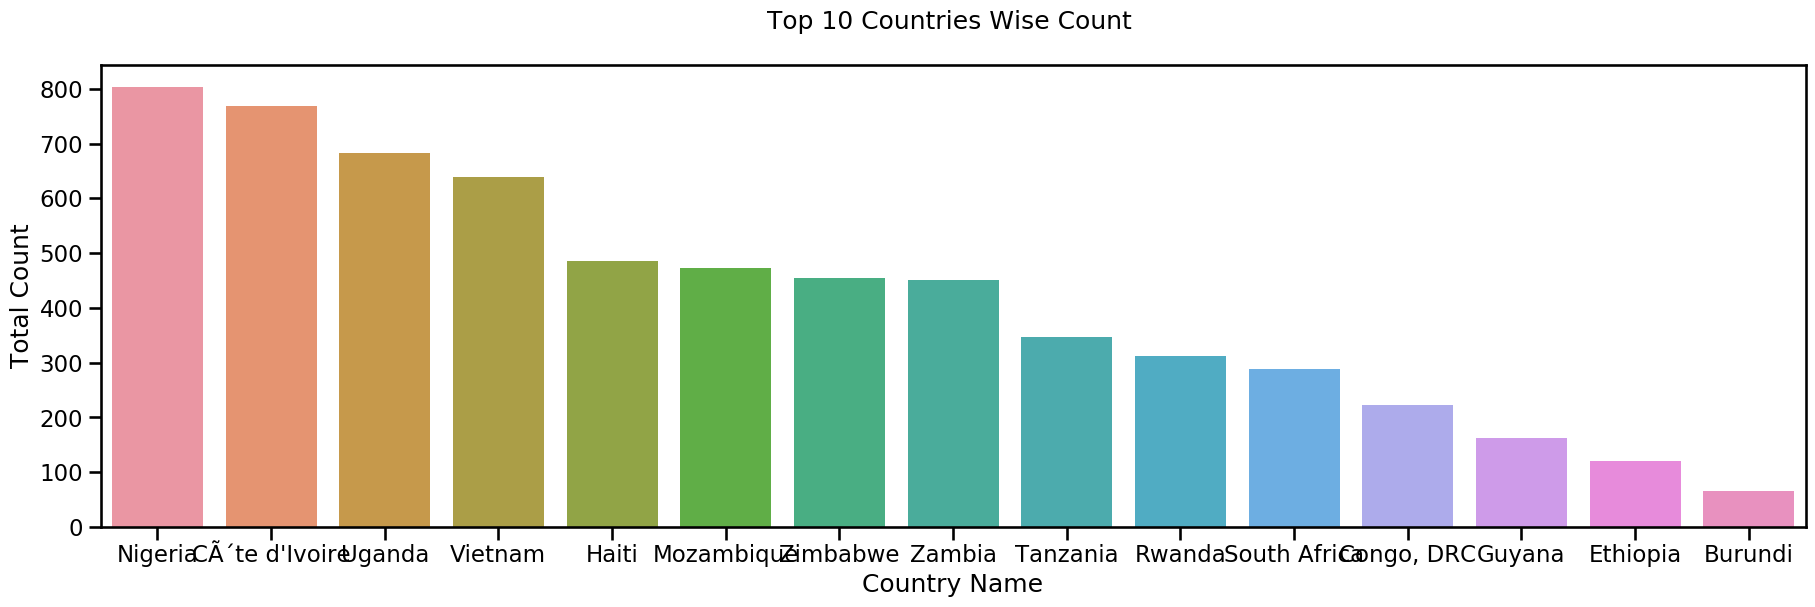

In [190]:
ItemCount = data["country"].value_counts().nlargest(15)
print("Top 10 Countries Wise Count \n")
print(ItemCount)
sns.set_context("talk",font_scale=1)
ptt.figure(figsize=(22,6))
sns.countplot(data['country'],order = data['country'].value_counts().nlargest(15).index)
ptt.title('Top 10 Countries Wise Count \n')
ptt.ylabel('Total Count')
ptt.xlabel('Country Name')


In [191]:
Tasks = []
for i in data['shipment mode'].unique():
    tmp = data[data["shipment mode"] == i]
    Tasks.append(tmp["shipment mode"].count())

    print (Tasks)

[3885]
[3885, 1774]
[3885, 1774, 567]
[3885, 1774, 567, 319]


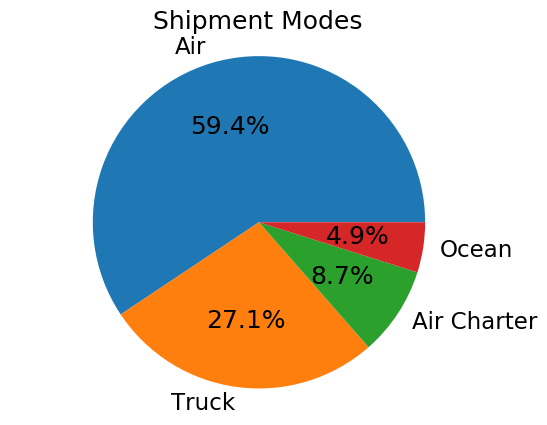

In [192]:
Tasks = []
for i in data['shipment mode'].unique():
    tmp = data[data["shipment mode"] == i]
    Tasks.append(tmp["shipment mode"].count())

my_labels = data['shipment mode'].unique()
ptt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
ptt.title('Shipment Modes')
ptt.axis('equal')
ptt.show()

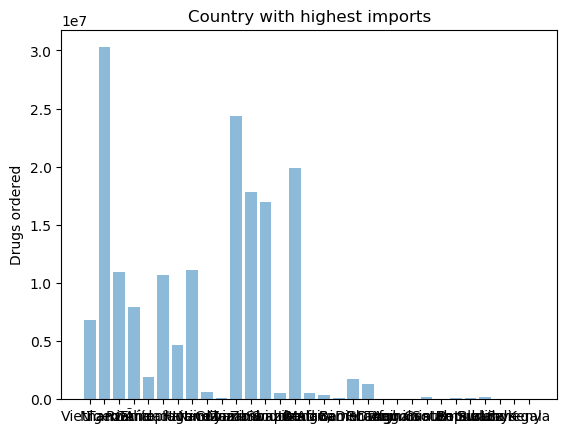

In [193]:
#country wise shipments

Taskd = []
for i in country_destin:
    tmp = data[data["country"] == i]
    Taskd.append(tmp["line item quantity"].sum())
    #country_destin 
    

ptt.rcdefaults()


y_pos = np.arange(len(country_destin))
Taskd

ptt.bar(y_pos, Taskd, align='center', alpha=0.5)
ptt.xticks(y_pos, country_destin)
ptt.ylabel('Drugs ordered')
ptt.title('Country with highest imports')

ptt.show()

In [194]:
a = np.argsort(Taskd)
top_ten_count = []
top_ten_count_val = []
for i in range(15):
    val = a[-1]
    a = a[:-1]
    top_ten_count.append(country_destin[val])
    top_ten_count_val.append(Taskd[val])

In [195]:
top_ten_count_val

[30274543,
 24328756,
 19895113,
 17835400,
 16950863,
 11090640,
 10914208,
 10646405,
 7962146,
 6806093,
 4692615,
 1879478,
 1722403,
 1277838,
 586694]

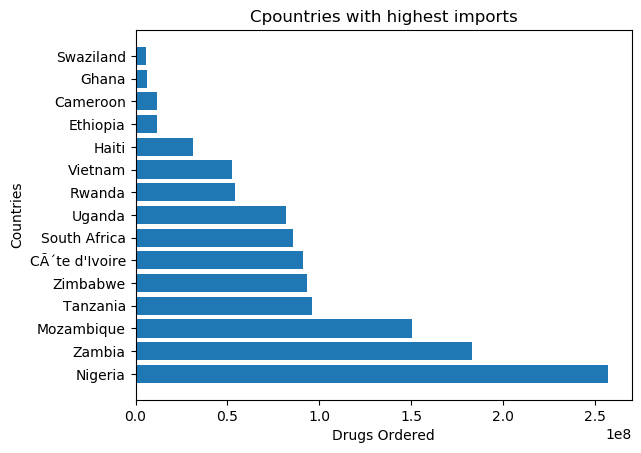

In [226]:
#top 15 countries with highest imports


#y_pos = np.arange(len(top_ten_count))


#ptt.bar(y_pos, top_ten_count_val, align='center', alpha=1)
#ptt.xticks(y_pos, top_ten_count)
#ptt.ylabel('Drugs ordered')
#ptt.title('Country with highest imports')

#ptt.show()




ptt.barh(top_ten_count,top_ten_count_val)
ptt.title('Cpountries with highest imports')
ptt.ylabel('Countries')
ptt.xlabel('Drugs Ordered')
ptt.show()


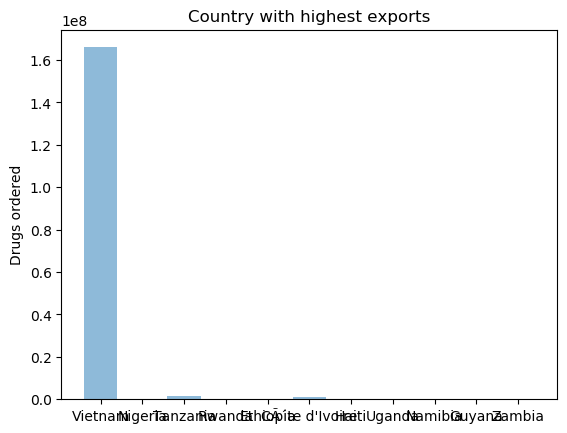

In [198]:
#country wise export

Taskn = []
for m in country_src:
    tmp = data[data["manufacturing site (Country)"] == m]
    Taskn.append(tmp["line item quantity"].sum())
     
    

ptt.rcdefaults()


y_pos = np.arange(len(country_src))
Taskd

ptt.bar(y_pos, Taskn, align='center', alpha=0.5)
ptt.xticks(y_pos, country_destin)
ptt.ylabel('Drugs ordered')
ptt.title('Country with highest exports')

ptt.show()

In [199]:
a = np.argsort(Taskn)
top_5_count = []
top_5_count_val = []
for i in range(5):
    val = a[-1]
    a = a[:-1]
    top_5_count.append(country_src[val])
    top_5_count_val.append(Taskn[val])

In [200]:
print(top_5_count_val)
print(top_5_count)

[165997421, 1641197, 961765, 280688, 138176]
['India', 'Germany', 'South Africa', 'Canada', 'UK']


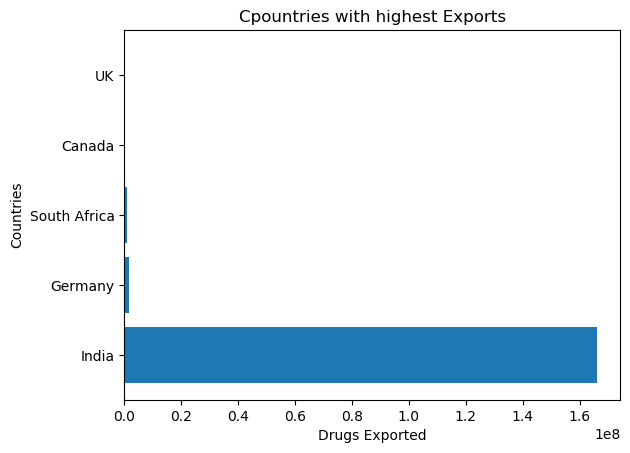

In [201]:
ptt.barh(top_5_count,top_5_count_val)
ptt.title('Cpountries with highest Exports')
ptt.ylabel('Countries')
ptt.xlabel('Drugs Exported')
ptt.show()

In [202]:
data['freight cost (usd)'] = pd.to_numeric(data["freight cost (usd)"], downcast="float")
data['line item insurance (usd)'] = pd.to_numeric(data["line item insurance (usd)"], downcast="float")

sum_column = (data['freight cost (usd)'] + data['line item insurance (usd)'])
data["Transportation Cost"] = sum_column

print(data["Transportation Cost"])

1         4591.625000
3        16077.184570
4        45520.203125
5         5990.544922
7         6282.535156
             ...     
10316     3525.110107
10317    47306.250000
10318    46981.210938
10319    46817.339844
10320    14896.629883
Name: Transportation Cost, Length: 6545, dtype: float32


In [203]:
data.dtypes

country                                 object
shipment mode                           object
scheduled delivery date         datetime64[ns]
delivered to client date                object
product group                           object
sub classification                      object
unit of measure (per pack)               int64
line item quantity                       int64
line item value                        float64
pack price                             float64
unit price                             float64
weight (kilograms)                      object
freight cost (usd)                     float32
line item insurance (usd)              float32
manufacturing site (Country)            object
Transportation Cost                    float32
dtype: object

In [205]:
#Now to calculate supply and demand

# using arrays
#0     count1 count2 .... count15
#sup1
#sup2
#sup3
#sup4
#sup5


#country_src           top_5_count               country
#country_destin        top_ten_count             manufacturing site (Country)

row0 = []
row0.append("O")
row0.append(country_destin)


row1 = []
row1.append(country_src[0])
for i in top_ten_count:
    v1 = data[data['country'] == i]
    va1 = v1[v1['manufacturing site (Country)'] == top_5_count[0]]
    tmp = va1['Transportation Cost'].sum()
    row1.append(tmp)

row2 = []
row2.append(country_src[1])
for i in top_ten_count:
    v1 = data[data['country'] == i]
    v1 = v1[v1['manufacturing site (Country)'] == top_5_count[1]]
    row2.append(v1['Transportation Cost'].sum())

row3 = []
row3.append(country_src[2])
for i in top_ten_count:
    v1 = data[data['country'] == i]
    v1 = v1[v1['manufacturing site (Country)'] == top_5_count[2]]
    row3.append(v1['Transportation Cost'].sum())
    
row4 = []
row4.append(country_src[3])
for i in top_ten_count:
    v1 = data[data['country'] == i]
    v1 = v1[v1['manufacturing site (Country)'] == top_5_count[3]]
    row4.append(v1['Transportation Cost'].sum())
    
row5 = []
row5.append(country_src[4])
for i in top_ten_count:
    v1 = data[data['country'] == i]
    v1 = v1[v1['manufacturing site (Country)'] == top_5_count[4]]
    row5.append(v1['Transportation Cost'].sum())

In [206]:
print(row0[0][0], end = "  ")
for i in range(15):
    print(row0[1][i], end = "  ")
print()
print()
    
for i in range(16):
    print(row1[i], end = "  ")

print()
print()

for i in range(16):
    print(row2[i], end = "  ")

print()
print()

for i in range(16):
    print(row3[i], end = "  ")
    
print()
print()

for i in range(16):
    print(row4[i], end = "  ")

print()
print()

for i in range(16):
    print(row5[i], end = "  ")

O  Vietnam  Nigeria  Tanzania  Rwanda  Ethiopia  CÃ´te d'Ivoire  Haiti  Uganda  Namibia  Guyana  Zambia  Mozambique  Zimbabwe  Swaziland  South Africa  

India  14690151.0  5863474.0  2549731.5  4640737.0  6453053.5  8498545.0  3582798.5  8226959.5  4794434.0  4151915.0  10653204.0  933559.7  2263237.2  636928.56  366564.7  

France  242539.48  55118.36  0.0  52728.73  133178.05  233335.55  253568.66  639665.75  54644.46  279801.94  167935.61  7984.8896  10395.75  4863.5596  0.0  

Germany  390785.84  42625.3  0.0  0.0  0.0  29725.434  18164.432  40701.004  15888.24  0.0  0.0  22989.5  0.0  0.0  0.0  

Switzerland  0.0  0.0  121380.766  0.0  0.0  0.0  636.18  0.0  0.0  0.0  1310.06  0.0  0.0  0.0  0.0  

UK  31359.51  111676.16  0.0  71314.36  500477.12  10877.62  55623.973  131261.11  27364.3  65351.082  19519.34  12180.2  0.0  0.0  0.0  

In [207]:
#demand and supply
dem = []
for i in top_ten_count:
    v1 = data[data['country'] == i]
    tmp = v1['line item quantity'].sum()
    dem.append(tmp)

dem

[30274543,
 24328756,
 19895113,
 17835400,
 16950863,
 11090640,
 10914208,
 10646405,
 7962146,
 6806093,
 4692615,
 1879478,
 1722403,
 1277838,
 586694]

In [209]:
sup = []
for i in top_5_count:
    v1 = data[data['manufacturing site (Country)'] == i]
    tmp = v1['line item quantity'].sum()
    sup.append(tmp)

sup

[165997421, 1641197, 961765, 280688, 138176]

In [210]:
#Now for maximizing profits


data["Profit"] = (data['line item value'] - (data['line item quantity']*data['unit price']) )

In [211]:
data["Profit"]

1          6170.00
3        125126.40
4        119700.00
5          2217.28
7         59834.53
           ...    
10316     96150.00
10317     20306.48
10318    726560.22
10319    589661.34
10320    135071.52
Name: Profit, Length: 6545, dtype: float64

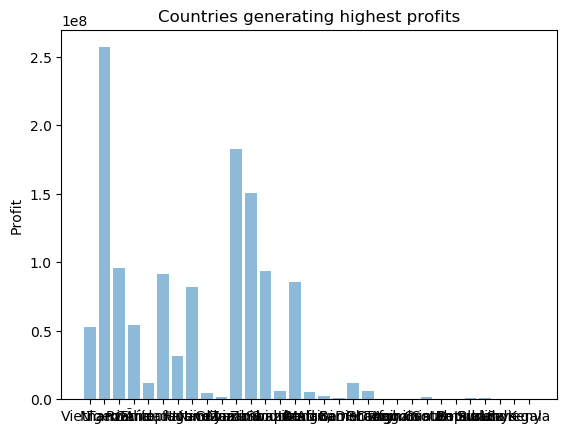

In [214]:
#country wise shipments

Taskd = []
for i in country_destin:
    tmp = data[data["country"] == i]
    Taskd.append(tmp["Profit"].sum())
    #country_destin 
    

ptt.rcdefaults()


y_pos = np.arange(len(country_destin))
Taskd

ptt.bar(y_pos, Taskd, align='center', alpha=0.5)
ptt.xticks(y_pos, country_destin)
ptt.ylabel('Profit')
ptt.title('Countries generating highest profits')

ptt.show()

In [215]:
a = np.argsort(Taskd)
top_ten_count = []
top_ten_count_val = []
for i in range(15):
    val = a[-1]
    a = a[:-1]
    top_ten_count.append(country_destin[val])
    top_ten_count_val.append(Taskd[val])

In [216]:
top_ten_count_val

[256989923.76,
 182904867.81,
 150525698.37,
 96143364.49,
 93338180.87,
 91247296.25999999,
 85419882.00999999,
 81619659.22,
 54126533.870000005,
 52530375.86,
 31419397.03,
 11852568.23,
 11693232.51,
 6275749.720000001,
 5877037.03]

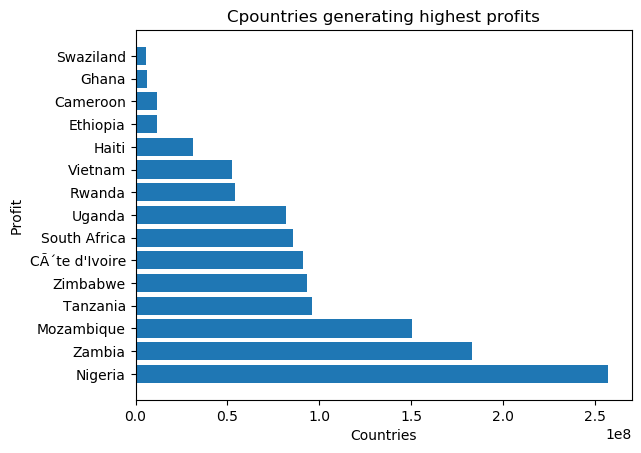

In [217]:
#top 15 countries generating highest profits


#y_pos = np.arange(len(top_ten_count))


#ptt.bar(y_pos, top_ten_count_val, align='center', alpha=1)
#ptt.xticks(y_pos, top_ten_count)
#ptt.ylabel('Drugs ordered')
#ptt.title('Country with highest imports')

#ptt.show()




ptt.barh(top_ten_count,top_ten_count_val)
ptt.title('Cpountries generating highest profits')
ptt.ylabel('Profit')
ptt.xlabel('Countries')
ptt.show()


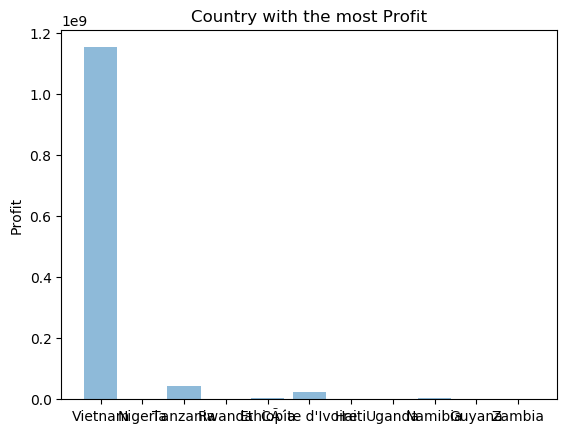

In [218]:
Taskn = []
for m in country_src:
    tmp = data[data["manufacturing site (Country)"] == m]
    Taskn.append(tmp["Profit"].sum())
     
    

ptt.rcdefaults()


y_pos = np.arange(len(country_src))
Taskd

ptt.bar(y_pos, Taskn, align='center', alpha=0.5)
ptt.xticks(y_pos, country_destin)
ptt.ylabel('Profit')
ptt.title('Country with the most Profit')

ptt.show()

In [219]:
a = np.argsort(Taskn)
top_5_count = []
top_5_count_val = []
for i in range(5):
    val = a[-1]
    a = a[:-1]
    top_5_count.append(country_src[val])
    top_5_count_val.append(Taskn[val])

In [220]:
print(top_5_count_val)
print(top_5_count)

[1153112052.69, 43757713.92999999, 24323576.82, 5389581.52, 2739299.33]
['India', 'Germany', 'South Africa', 'UK', 'Canada']


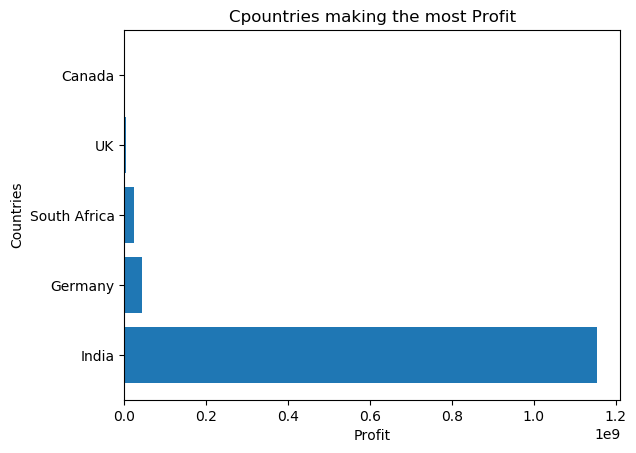

In [221]:
ptt.barh(top_5_count,top_5_count_val)
ptt.title('Cpountries making the most Profit')
ptt.ylabel('Countries')
ptt.xlabel('Profit')
ptt.show()

In [222]:
#Now to calculate supply and demand

#array
#0     count1 count2 .... count15
#sup1
#sup2
#sup3
#sup4
#sup5


#country_src           top_5_count               country
#country_destin        top_ten_count             manufacturing site (Country)

row0 = []
row0.append("O")
row0.append(country_destin)


row1 = []
row1.append(country_src[0])
for i in top_ten_count:
    v1 = data[data['country'] == i]
    va1 = v1[v1['manufacturing site (Country)'] == top_5_count[0]]
    tmp = va1['Profit'].sum()
    row1.append(tmp)

row2 = []
row2.append(country_src[1])
for i in top_ten_count:
    v1 = data[data['country'] == i]
    v1 = v1[v1['manufacturing site (Country)'] == top_5_count[1]]
    row2.append(v1['Profit'].sum())

row3 = []
row3.append(country_src[2])
for i in top_ten_count:
    v1 = data[data['country'] == i]
    v1 = v1[v1['manufacturing site (Country)'] == top_5_count[2]]
    row3.append(v1['Profit'].sum())
    
row4 = []
row4.append(country_src[3])
for i in top_ten_count:
    v1 = data[data['country'] == i]
    v1 = v1[v1['manufacturing site (Country)'] == top_5_count[3]]
    row4.append(v1['Profit'].sum())
    
row5 = []
row5.append(country_src[4])
for i in top_ten_count:
    v1 = data[data['country'] == i]
    v1 = v1[v1['manufacturing site (Country)'] == top_5_count[4]]
    row5.append(v1['Profit'].sum())

In [223]:
print(row0[0][0], end = "  ")
for i in range(15):
    print(row0[1][i], end = "  ")
print()
print()
    
for i in range(16):
    print(row1[i], end = "  ")

print()
print()

for i in range(16):
    print(row2[i], end = "  ")

print()
print()

for i in range(16):
    print(row3[i], end = "  ")
    
print()
print()

for i in range(16):
    print(row4[i], end = "  ")

print()
print()

for i in range(16):
    print(row5[i], end = "  ")

O  Vietnam  Nigeria  Tanzania  Rwanda  Ethiopia  CÃ´te d'Ivoire  Haiti  Uganda  Namibia  Guyana  Zambia  Mozambique  Zimbabwe  Swaziland  South Africa  

India  234508072.02999997  173193940.44  146789203.55  87941967.0  91081402.55000001  78623618.27  82800233.57  78954138.07000001  53643843.08  40897917.12  30536135.489999995  11031768.550000003  11641840.51  6263754.36  5877037.03  

France  5996209.19  2763189.83  2874571.16  5354098.59  653762.88  10711045.19  0.0  2042317.5  298029.19  10998202.06  706249.6299999999  382984.8  51392.0  11995.36  0.0  

Germany  15774164.36  5523201.22  0.0  1486655.77  0.0  556668.54  0.0  590349.16  26436.71  0.0  0.0  366101.06  0.0  0.0  0.0  

Switzerland  103702.29000000001  1424536.32  512492.42  230669.93000000002  1603015.4400000002  933698.8600000001  0.0  18204.96  71306.48  350319.20000000007  43122.7  43512.78  0.0  0.0  0.0  

UK  0.0  0.0  0.0  1982.6399999999999  0.0  0.0  2619648.44  0.0  0.0  0.0  117668.25  0.0  0.0  0.0  0.0  

In [224]:
#supply & demand
dem = []
for i in top_ten_count:
    v1 = data[data['country'] == i]
    tmp = v1['line item quantity'].sum()
    dem.append(tmp)

dem

[30274543,
 24328756,
 17835400,
 10914208,
 16950863,
 10646405,
 19895113,
 11090640,
 7962146,
 6806093,
 4692615,
 1879478,
 1722403,
 1277838,
 512198]

In [225]:
sup = []
for i in top_5_count:
    v1 = data[data['manufacturing site (Country)'] == i]
    tmp = v1['line item quantity'].sum()
    sup.append(tmp)

sup

[165997421, 1641197, 961765, 138176, 280688]

In [ ]:
#And we end with that